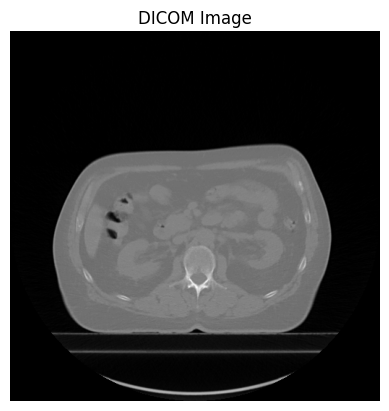

In [14]:
import pydicom
import matplotlib.pyplot as plt

# Chargement du fichier DICOM
file_path = '1-001.dcm'
dicom_data = pydicom.dcmread(file_path)

# Extraction de l'image des données DICOM
image = dicom_data.pixel_array

# Affichage de l'image
plt.imshow(image, cmap='gray')  # Utilisation d'une colormap en niveaux de gris
plt.axis('off')  # Désactivation des axes pour une meilleure visualisation
plt.title('DICOM Image')
plt.show()

In [3]:
import torchvision.transforms as transforms
from pydicom.data import get_testdata_file
import torch

# Transformation 1

In [35]:
# Chargement du fichier DICOM
file_path = '1-001.dcm'
dicom_data = pydicom.dcmread(file_path)

# Extraction de l'image des données DICOM
image_array = dicom_data.pixel_array
image_tensor = torch.from_numpy(image_array).float()  # Conversion en tensor

# Normalisation du tensor pour éviter des effets de saturation non désirés
image_tensor = image_tensor / image_tensor.max()

# Transformation pour augmenter la luminosité
brightness_transform = transforms.ColorJitter(brightness=0.5)  # Augmenter la luminosité de 50%
brightened_image = brightness_transform(image_tensor)

# Remise à l'échelle pour correspondre à l'original DICOM
brightened_image = brightened_image * image_tensor.max()

# Conversion du tensor transformé en array numpy
brightened_image_numpy = brightened_image.numpy().astype(dicom_data.pixel_array.dtype)

# Mise à jour des données pixel_array avec l'image transformée
dicom_data.PixelData = brightened_image_numpy.tobytes()
dicom_data.save_as('brightened_1-001.dcm')

# Transformation 2

In [ ]:
# 

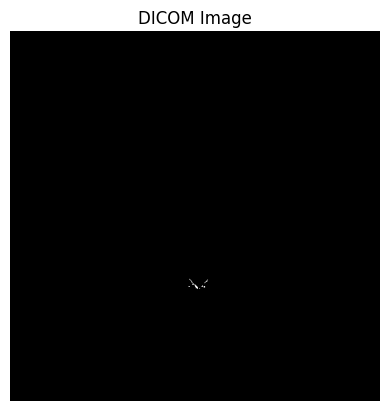

In [36]:
# Chargement du fichier DICOM
file_path = 'brightened_1-001.dcm'
dicom_data = pydicom.dcmread(file_path)

# Extraction de l'image des données DICOM
image = dicom_data.pixel_array

# Affichage de l'image
plt.imshow(image, cmap='gray')  # Utilisation d'une colormap en niveaux de gris
plt.axis('off')  # Désactivation des axes pour une meilleure visualisation
plt.title('DICOM Image')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
PixelData is present.
2035


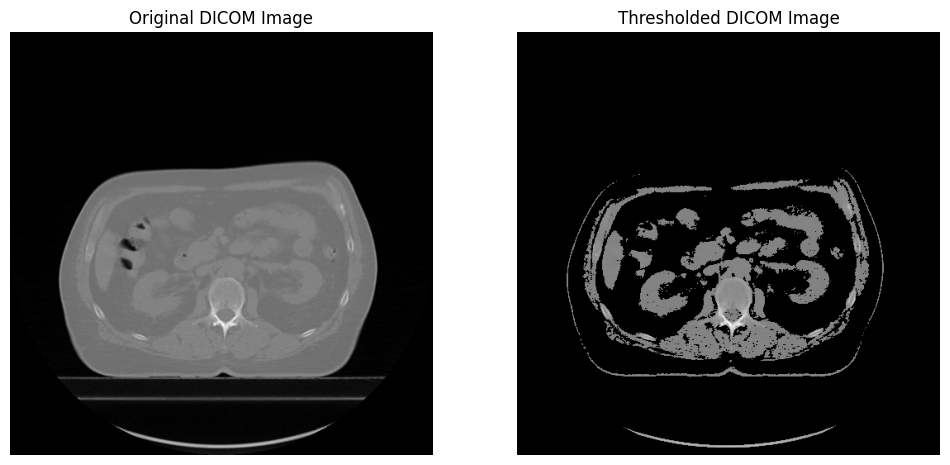

In [2]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Chargement du fichier DICOM
file_path = '1-001.dcm'
dicom_data = pydicom.dcmread(file_path)

# Extraction de l'image des données DICOM
image = dicom_data.pixel_array
print(image)
# Vérifiez si 'PixelData' est présent dans le dataset
if 'PixelData' in dicom_data:
    print("PixelData is present.")
else:
    print("PixelData is not present.")
          
# Application du seuillage simple
thresholded_image = np.where(image > 1000, image, 0)
print(np.max(image))
# Affichage de l'image originale et de l'image seuillée
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original DICOM Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded DICOM Image')
plt.axis('off')

plt.show()


In [2]:
import os

import pydicom

file_path = '1-001.dcm'

if os.path.exists(file_path):
    dicom_data = pydicom.dcmread(file_path)
    print("Fichier chargé avec succès.")
    print("Pixel data:", dicom_data.pixel_array.shape)
else:
    print(f"Erreur: Le fichier {file_path} n'a pas été trouvé.")

Fichier chargé avec succès.
Pixel data: (512, 512)


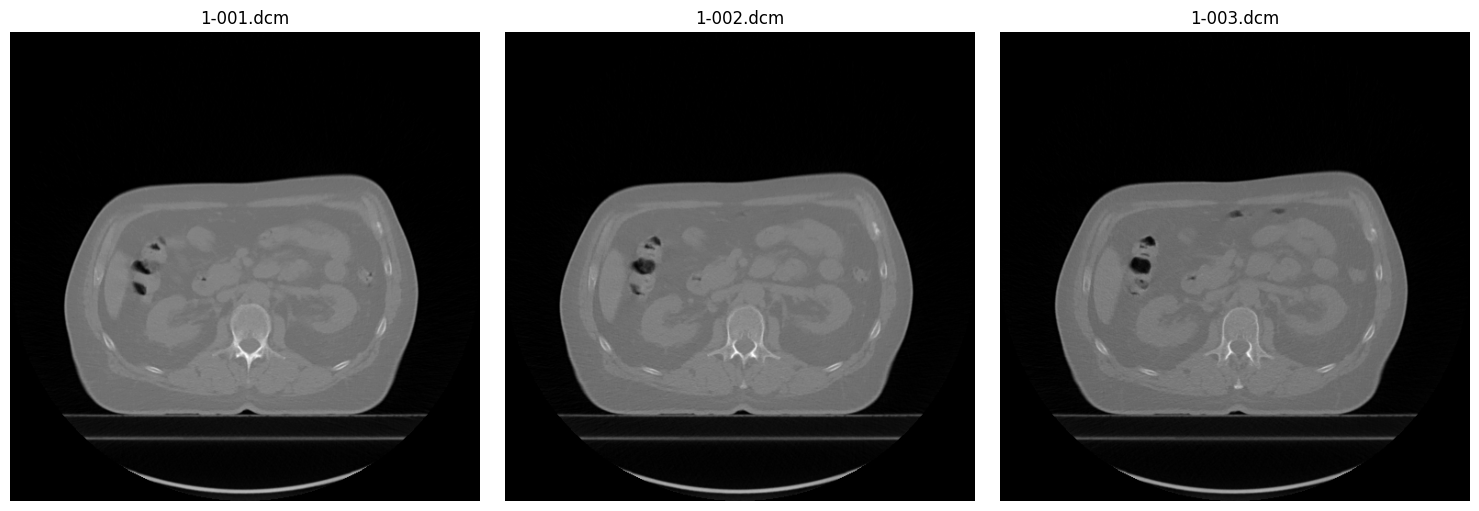

In [4]:
import pydicom
import matplotlib.pyplot as plt
import os

# Liste des fichiers DICOM à charger
dicom_files = ['1-001.dcm', '1-002.dcm', '1-003.dcm']

# Création d'une figure pour l'affichage des images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boucle sur les fichiers et les axes pour charger et afficher chaque image
for ax, file_name in zip(axes, dicom_files):
    # Construction du chemin complet si nécessaire
    file_path = os.path.join('./', file_name)  # Ajustez le chemin si vos fichiers sont ailleurs
    
    # Vérification de l'existence du fichier
    if os.path.exists(file_path):
        # Chargement des données DICOM
        dicom_data = pydicom.dcmread(file_path)
        
        # Extraction des données de l'image
        image = dicom_data.pixel_array
        
        # Affichage de l'image
        ax.imshow(image, cmap='gray')
        ax.set_title(file_name)
        ax.axis('off')  # Désactivation des axes pour une meilleure visualisation
    else:
        ax.text(0.5, 0.5, 'Fichier non trouvé', horizontalalignment='center', verticalalignment='center')
        ax.axis('off')

# Affichage de la figure contenant les images
plt.tight_layout()
plt.show()


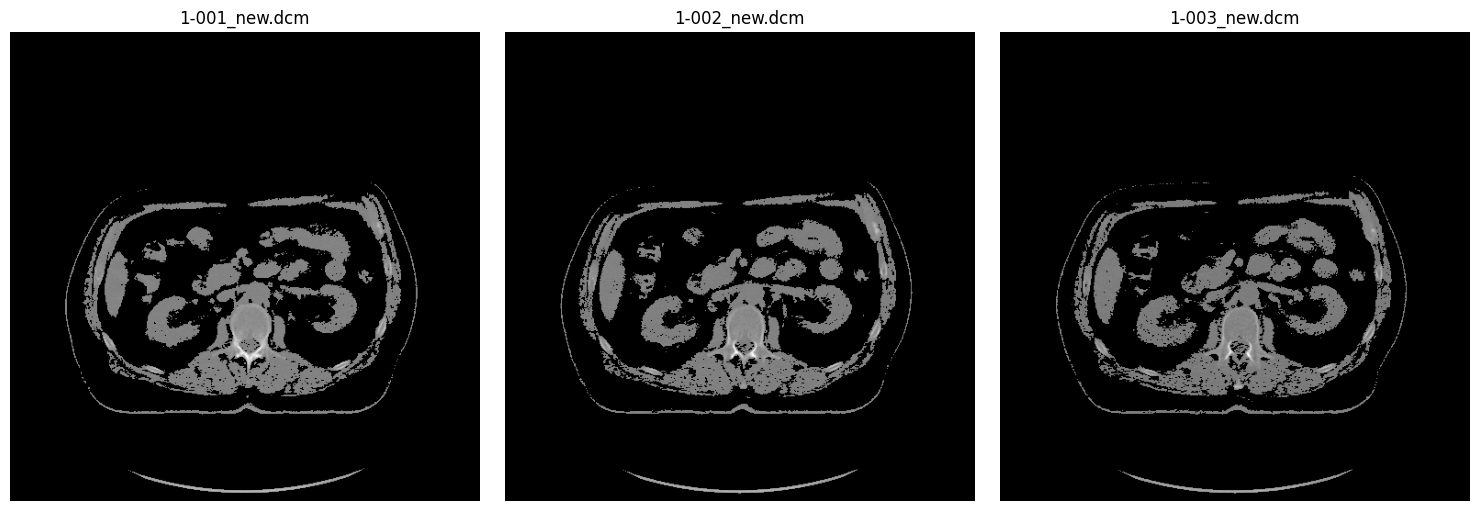

In [3]:
import pydicom
import matplotlib.pyplot as plt
import os

# Liste des fichiers DICOM à charger
dicom_files = ['1-001_new.dcm', '1-002_new.dcm', '1-003_new.dcm']

# Création d'une figure pour l'affichage des images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boucle sur les fichiers et les axes pour charger et afficher chaque image
for ax, file_name in zip(axes, dicom_files):
    # Construction du chemin complet si nécessaire
    file_path = os.path.join('./', file_name)  # Ajustez le chemin si vos fichiers sont ailleurs
    
    # Vérification de l'existence du fichier
    if os.path.exists(file_path):
        # Chargement des données DICOM
        dicom_data = pydicom.dcmread(file_path)
        
        # Extraction des données de l'image
        image = dicom_data.pixel_array
        
        # Affichage de l'image
        ax.imshow(image, cmap='gray')
        ax.set_title(file_name)
        ax.axis('off')  # Désactivation des axes pour une meilleure visualisation
    else:
        ax.text(0.5, 0.5, 'Fichier non trouvé', horizontalalignment='center', verticalalignment='center')
        ax.axis('off')

# Affichage de la figure contenant les images
plt.tight_layout()
plt.show()
